In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
dataset = pd.read_csv('./data/stud.csv')

In [3]:
x = dataset.drop(columns=['math_score'],axis=1)
y = dataset['math_score']

In [4]:
numerical_features = x.select_dtypes(exclude="object").columns
categorical_features = x.select_dtypes(include="object").columns

numerical_transformers = StandardScaler()
oh_transformers = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder",oh_transformers,categorical_features),
     ("StandardScaler",numerical_transformers,numerical_features)
     ])

In [5]:
x = preprocessor.fit_transform(x)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.30)
x_train.shape,x_test.shape

((700, 19), (300, 19))

In [7]:
def evaluate_model(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    rmse = root_mean_squared_error(actual,predicted)
    r2_square = r2_score(actual,predicted)
    return mae,mse,rmse,r2_square


In [8]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "XGBRegressor":XGBRegressor(verbose=False),
    "CatBossting Regresor":CatBoostRegressor(verbose=False),
    "AdaBossting Regressor":AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_predicted = model.predict(x_train)
    y_test_predicted = model.predict(x_test)

    model_train_mae,model_train_mae,model_train_rsme,model_train_r2 = evaluate_model(y_train,y_train_predicted)

    model_test_mae,model_test_mae,model_test_rsme,model_test_r2 = evaluate_model(y_test,y_test_predicted)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Perormance for Training Set")
    print("-Root Mean Square Error: {:.4f}".format(model_train_rsme))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print("--"*23,"\n")

    print("Model Perormance for Test Set")
    print("-Root Mean Square Error: {:.4f}".format(model_test_rsme))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("=="*23,"\n")


Linear Regression
Model Perormance for Training Set
-Root Mean Square Error: 5.2483
-Mean Absolute Error: 27.5447
-R2 Score: 0.8751
---------------------------------------------- 

Model Perormance for Test Set
-Root Mean Square Error: 5.5576
-Mean Absolute Error: 30.8866
-R2 Score: 0.8759

Lasso
Model Perormance for Training Set
-Root Mean Square Error: 6.5106
-Mean Absolute Error: 42.3875
-R2 Score: 0.8078
---------------------------------------------- 

Model Perormance for Test Set
-Root Mean Square Error: 6.8705
-Mean Absolute Error: 47.2041
-R2 Score: 0.8103

Ridge
Model Perormance for Training Set
-Root Mean Square Error: 5.2487
-Mean Absolute Error: 27.5484
-R2 Score: 0.8751
---------------------------------------------- 

Model Perormance for Test Set
-Root Mean Square Error: 5.5566
-Mean Absolute Error: 30.8757
-R2 Score: 0.8759

K-Neighbors Regressor
Model Perormance for Training Set
-Root Mean Square Error: 5.6853
-Mean Absolute Error: 32.3232
-R2 Score: 0.8535
------------

d:\LEARNINGS\MLPROJECT\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


CatBossting Regresor
Model Perormance for Training Set
-Root Mean Square Error: 2.9221
-Mean Absolute Error: 8.5384
-R2 Score: 0.9613
---------------------------------------------- 

Model Perormance for Test Set
-Root Mean Square Error: 6.0661
-Mean Absolute Error: 36.7972
-R2 Score: 0.8521

AdaBossting Regressor
Model Perormance for Training Set
-Root Mean Square Error: 5.7758
-Mean Absolute Error: 33.3600
-R2 Score: 0.8488
---------------------------------------------- 

Model Perormance for Test Set
-Root Mean Square Error: 6.2670
-Mean Absolute Error: 39.2753
-R2 Score: 0.8421



In [9]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.875863
6,CatBossting Regresor,0.852108
7,AdaBossting Regressor,0.842148
5,XGBRegressor,0.811816
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772528
4,Decision Tree Regressor,0.735274


In [10]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("Accuracy of model is %.2f"%score)

Accuracy of model is 0.88


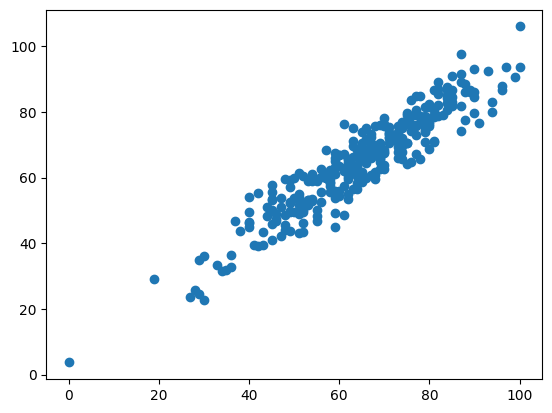

In [11]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math_score'>

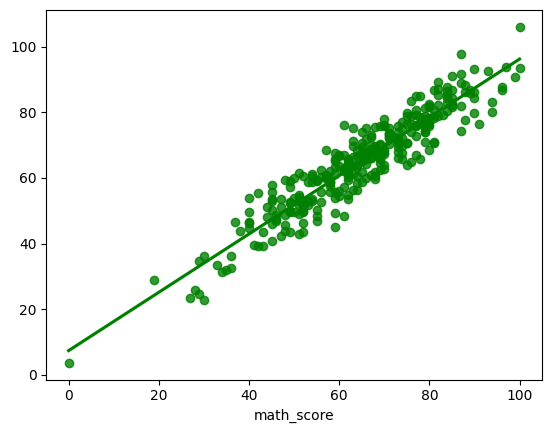

In [12]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="green")

In [24]:
predicted_df = pd.DataFrame({
    "Actual Value": y_test,
    "Predicted Value": y_pred,
    "Difference": y_test - y_pred
}).sort_values(['Difference'], ascending=False)

filtered_df = predicted_df[(predicted_df['Difference'] > 0) & (predicted_df['Difference'] <= 2)]
filtered_df

,Actual Value,Predicted Value,Difference
789,52,50.032651,1.967349
924,74,72.065188,1.934812
290,76,74.085737,1.914263
617,88,86.091860,1.908140
210,80,78.236273,1.763727
30,69,67.247665,1.752335
621,62,60.326672,1.673328
292,63,61.340167,1.659833
692,66,64.381381,1.618619
72,41,39.463673,1.536327
